# Ensemble Learning

## Initial Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [27]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.metrics import classification_report_imbalanced

## Read the CSV and Perform Basic Data Cleaning

In [4]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


## Split the Data into Training and Testing

In [5]:
# Create our features
X = df.copy()
X.drop(["loan_status"], axis=1, inplace=True)
X = pd.get_dummies(X)

# Create our target
y = df["loan_status"].to_frame()

In [6]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,issue_d_Mar-2019,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,debt_settlement_flag_N
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.0,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.0
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.177238,1.0,0.123879,0.876121,0.383161,0.616839,0.860340,0.139660,1.0,1.0
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.381873,0.0,0.329446,0.329446,0.486161,0.486161,0.346637,0.346637,0.0,0.0
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.0
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.0
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


In [7]:
# Check the balance of our target values
df["loan_status"].values

array(['low_risk', 'low_risk', 'low_risk', ..., 'low_risk', 'low_risk',
       'low_risk'], dtype=object)

In [8]:
# Split the X and y into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [9]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [10]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [11]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Random Forest Classifier

In [12]:
# Resample the training data with the BalancedRandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)

In [13]:
# Making predictions using the testing data
predictions_1 = rf_model.predict(X_test_scaled)


In [14]:
# Calculating the confusion matrix
cm_1 = confusion_matrix(y_test, predictions_1)
cm_1_df = pd.DataFrame(
    cm_1, index=["Actual high_risk", "Actual low_risk"], columns=["Predicted high_risk", "Predicted low_risk"]
)

# Calculating the accuracy score
acc_score_1 = accuracy_score(y_test, predictions_1)


In [34]:
# Displaying results
print("Confusion Matrix")
display(cm_1_df)
print(f"Accuracy Score : {acc_score_1}")
print("Classification Report")
print(classification_report_imbalanced(y_test, predictions_1))

Confusion Matrix


,Predicted high_risk,Predicted low_risk
Actual high_risk,29,63
Actual low_risk,21,17092


Accuracy Score : 0.9951176983435048
Classification Report
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.58      0.32      1.00      0.41      0.56      0.29        92
   low_risk       1.00      1.00      0.32      1.00      0.56      0.34     17113

avg / total       0.99      1.00      0.32      0.99      0.56      0.34     17205



In [16]:
# Sort top 10 importances
importances_sorted_1 = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted_1[:10]

[(0.08686249409447748, 'last_pymnt_amnt'),
 (0.07890443783102251, 'total_rec_int'),
 (0.06987832173990749, 'total_rec_prncp'),
 (0.06908322512289755, 'total_pymnt'),
 (0.06613776899830803, 'total_pymnt_inv'),
 (0.019100920178083854, 'installment'),
 (0.018782059588492026, 'out_prncp'),
 (0.018664843118355756, 'out_prncp_inv'),
 (0.018473409896280737, 'mo_sin_old_rev_tl_op'),
 (0.016124818787289778, 'dti')]

### Balanced Random Forest Classifier

In [17]:
# Resample the training data with the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators=500, random_state=78)
brf_model = brf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions_2 = brf_model.predict(X_test_scaled)

In [18]:
# Calculating the confusion matrix
cm_2 = confusion_matrix(y_test, predictions_2)
cm_2_df = pd.DataFrame(
    cm_2, index=["Actual high_risk", "Actual low_risk"], columns=["Predicted high_risk", "Predicted low_risk"]
)

# Calculating the accuracy score
acc_score_2 = accuracy_score(y_test, predictions_2)

In [28]:
# Displaying results
print("Confusion Matrix")
display(cm_2_df)
print(f"Accuracy Score : {acc_score_2}")
print("Classification Report")
print(classification_report_imbalanced(y_test, predictions_2))

Confusion Matrix


,Predicted high_risk,Predicted low_risk
Actual high_risk,59,33
Actual low_risk,1404,15709


Accuracy Score : 0.9164777680906713
Classification Report
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.64      0.92      0.08      0.77      0.57        92
   low_risk       1.00      0.92      0.64      0.96      0.77      0.60     17113

avg / total       0.99      0.92      0.64      0.95      0.77      0.60     17205



In [29]:
# Sort top 10 importances
importances_2_sorted = sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)
importances_2_sorted[:10]

[(0.07239290541174957, 'total_rec_prncp'),
 (0.06733303127962115, 'last_pymnt_amnt'),
 (0.06718324331180901, 'total_pymnt_inv'),
 (0.05746049006493996, 'total_pymnt'),
 (0.05259921495573907, 'total_rec_int'),
 (0.029610942008818013, 'int_rate'),
 (0.02204428929077674, 'issue_d_Jan-2019'),
 (0.016566562106507986, 'dti'),
 (0.01635120518538894, 'mo_sin_old_rev_tl_op'),
 (0.01594212905787986, 'out_prncp')]

### Easy Ensemble Classifier

In [30]:
# Train the Classifier
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(n_estimators=500, random_state=78)
eec_model = eec.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions_3 = eec_model.predict(X_test_scaled)

In [31]:
# Calculating the confusion matrix
cm_3 = confusion_matrix(y_test, predictions_3)
cm_3_df = pd.DataFrame(
    cm_3, index=["Actual high_risk", "Actual low_risk"], columns=["Predicted high_risk", "Predicted low_risk"]
)

# Calculating the accuracy score
acc_score_3 = accuracy_score(y_test, predictions_3)

In [32]:
# Displaying results
print("Confusion Matrix")
display(cm_3_df)
print(f"Accuracy Score : {acc_score_3}")
print("Classification Report")
print(classification_report_imbalanced(y_test, predictions_3))

Confusion Matrix


,Predicted high_risk,Predicted low_risk
Actual high_risk,85,7
Actual low_risk,1061,16052


Accuracy Score : 0.9379250217959896
Classification Report
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.07      0.92      0.94      0.14      0.93      0.87        92
   low_risk       1.00      0.94      0.92      0.97      0.93      0.87     17113

avg / total       0.99      0.94      0.92      0.96      0.93      0.87     17205



In [33]:
# Sort top 10 importances
#importances_3_sorted = sorted(zip(eec_model.feature_importances_, X.columns), reverse=True)
#importances_3_sorted[:10]

# 'EasyEnsembleClassifier' object has no attribute 'feature_importances_'

### Final Questions - please refer to the Read me file. 

1. Which model had the best balanced accuracy score?

    YOUR ANSWER HERE.

2. Which model had the best recall score?

    YOUR ANSWER HERE.

3. Which model had the best geometric mean score?

    YOUR ANSWER HERE.

4. What are the top three features?

    YOUR ANSWER HERE.

# Please do not consider the below. it was an attempt to create the PR curve. 

## PR Curve: Balanced Random Forest vs. Easy Ensemble Classifier

In [36]:
from sklearn.metrics import precision_recall_curve

probs_brf = brf_model.predict_proba(X_test)[:, 1]
probs_eec = eec_model.predict_proba(X_test)[:, 1]
precision_brf, recall_brf, _ = precision_recall_curve(y_test, probs_brf, pos_label=1)
precision_eec, recall_eec, _ = precision_recall_curve(y_test, probs_eec, pos_label=1)

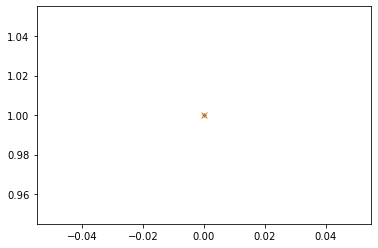

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(recall_brf, precision_brf, marker='.')
plt.plot(recall_eec, precision_eec, marker='x')

In [ ]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, probs_brf)

In [ ]:
average_precision_score(y_test, probs_eec)